# Logistic Regression Project 

Indicate whether or not a particular internet user clicked on an Advertisement from a fake advertising data set. Create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set_style('whitegrid')

%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
df = pd.read_csv('17-advertising.csv')

In [3]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

** Create a histogram of the Age**

Text(0.5, 0, 'Age')

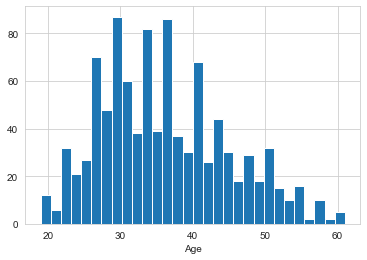

In [6]:
df['Age'].hist(bins=30)
plt.xlabel("Age")

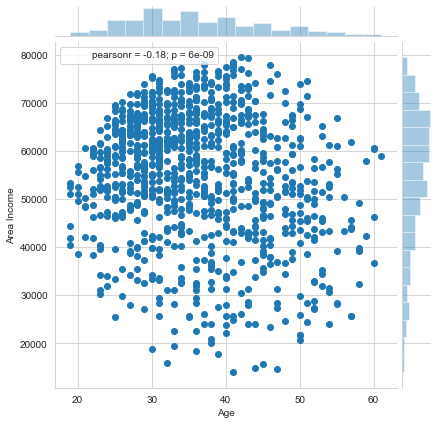

In [7]:
jp1 = sns.jointplot(x='Age', y ='Area Income', data=df, kind='scatter', ratio=10)
jp1.annotate(stats.pearsonr)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age and 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

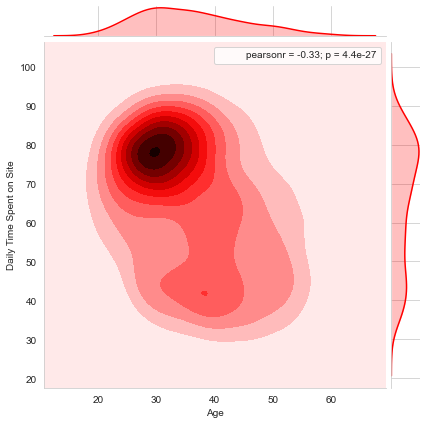

In [8]:
jp2 = sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, kind='kde', color='red', ratio=10)
jp2.annotate(stats.pearsonr)

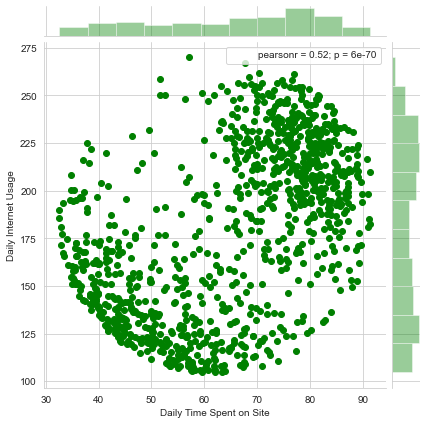

In [9]:
jp3 = sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df, kind='scatter', ratio=10, color='green')
jp3.annotate(stats.pearsonr)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

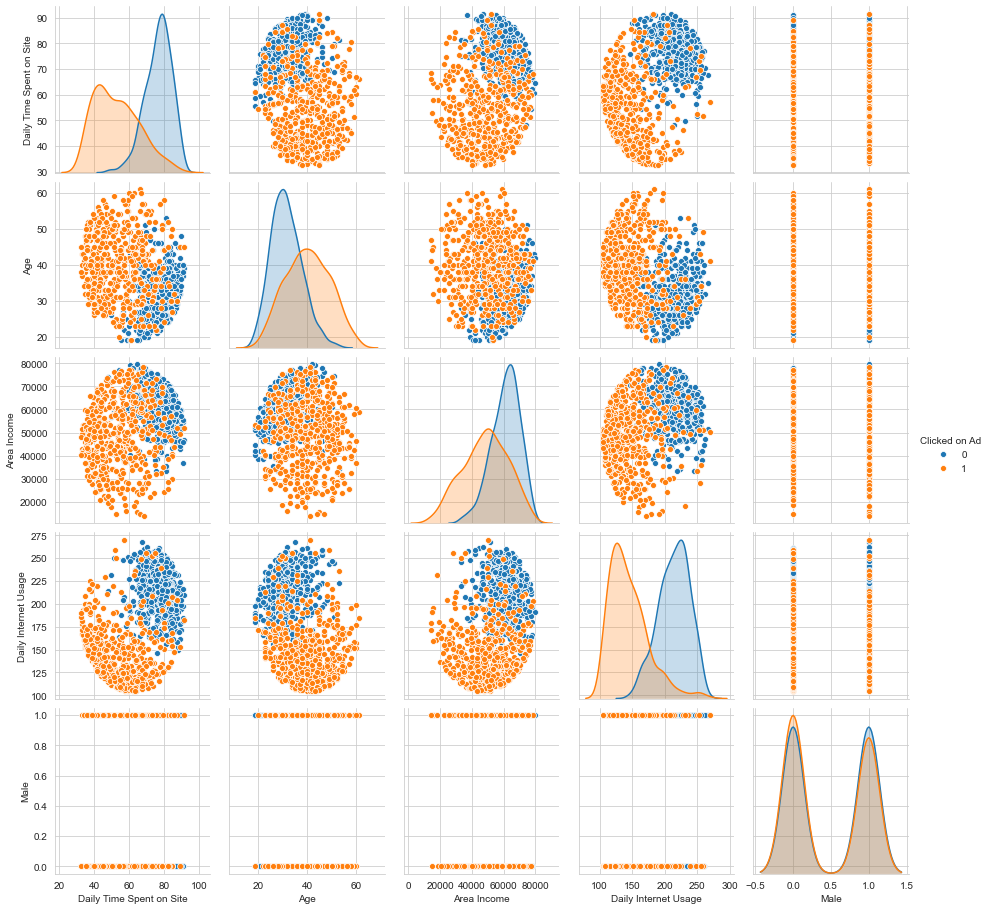

In [10]:
sns.pairplot(df, hue='Clicked on Ad')

# Logistic Regression

Train the model

** Split the data into training set and testing set using train_test_split**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
df2 = df.drop(['Ad Topic Line', 'City', 'Country'], axis=1)
df2.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0


In [13]:
df2['Timestamp'] = pd.to_datetime(df['Timestamp'])
df2['Month'] = df2['Timestamp'].apply(lambda i: i.month)
df2['Hour'] = df2['Timestamp'].apply(lambda i: i.hour)
df2['Year'] = df2['Timestamp'].apply(lambda i: i.year)
df2['Week Day'] = df2['Timestamp'].apply(lambda i: i.weekday())
df2.drop('Timestamp', axis=1, inplace=True)

#weekday = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df2.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Hour,Year,Week Day
0,68.95,35,61833.90,256.09,0,0,3,0,2016,6
1,80.23,31,68441.85,193.77,1,0,4,1,2016,0
2,69.47,26,59785.94,236.50,0,0,3,20,2016,6


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Hour                      1000 non-null   int64  
 8   Year                      1000 non-null   int64  
 9   Week Day                  1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [15]:
x_train, x_test, y_train, y_test = train_test_split(df2.drop('Clicked on Ad', axis=1), df2['Clicked on Ad'], test_size=0.3, random_state=101)

In [16]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
predict = logmodel.predict(x_test)

In [17]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       157
           1       0.98      0.97      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [18]:
print(confusion_matrix(y_test,predict))

[[154   3]
 [  5 138]]
